# Heart Stroke prediction - Machine Learning approach

### Introduction

According to the World Health Organisation, Cardiovascular Diseases (CVDs) remain to be the main cause of death worldwide.  Thus, identifying individuals at risk of stroke is crucial for preventive interventions and improving health outcomes. Machine learning techniques offer promising avenues for stroke prediction by analyzing various risk factors and their interactions. In this study, we present a classification machine learning model designed to predict the likelihood of stroke based on demographic, lifestyle, and clinical features.

### Content and algorithms: 


## Data Preview

In [37]:
import pandas as pd 
import numpy as np 
from ydata_profiling import ProfileReport

In [38]:
import matplotlib
matplotlib.use('TkAgg')

import matplotlib.pyplot as plt

In [39]:
# Set the display format for floating-point numbers
pd.set_option('display.float_format', '{:.4f}'.format)

In [40]:
stroke_data = pd.read_csv('data/stroke_data.csv')

In [41]:
stroke_data

,id,age,avg_glucose_level,bmi,ever_married,feat01,feat02,feat03,feat04,feat05,...,feat08,feat09,feat10,gender,heart_disease,hypertension,Residence_type,smoking_status,stroke,work_type
0,1,43.0000,92.7100,30.5000,Yes,0.6216,0.6636,1.0703,1.2745,1.3907,...,1.1747,1.1307,0.4158,Male,0,0,Urban,formerly smoked,0,Private
1,2,59.0000,93.9000,42.2000,Yes,0.2858,0.4051,1.2722,0.9503,1.5604,...,0.9100,0.5848,0.5955,Male,0,0,Rural,never smoked,0,Private
2,3,25.0000,92.1400,36.2000,Yes,0.6959,0.4963,1.4668,1.0263,0.5139,...,1.5253,0.8223,0.1276,Male,0,0,Rural,Unknown,0,Private
3,4,74.0000,205.8400,54.6000,Yes,0.7181,0.4085,0.6438,0.8952,0.9654,...,1.4003,1.2426,0.3291,Female,0,1,Urban,never smoked,0,Self-employed
4,5,34.0000,79.8000,37.4000,Yes,0.4722,0.4638,1.1612,1.3084,0.8025,...,1.5124,1.3106,0.3367,Female,0,0,Urban,smokes,0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5354,5355,62.0000,98.0500,27.9000,Yes,0.6588,0.4631,1.1928,0.8352,1.0432,...,1.2921,0.7789,0.5882,Female,0,0,Rural,never smoked,0,Private
5355,5356,78.0000,244.9700,NaN,Yes,0.2496,0.4180,0.8447,0.7113,1.8057,...,0.7072,0.8729,0.4280,Male,0,0,Urban,formerly smoked,1,Private
5356,5357,56.0000,227.0400,23.0000,Yes,0.5955,0.6009,1.2593,0.2409,1.0876,...,1.3512,1.0232,0.7545,Female,0,0,Rural,smokes,0,Private
5357,5358,77.0000,190.6900,31.4000,Yes,0.3484,0.2541,0.9378,0.6646,1.4418,...,1.0762,1.1184,0.5017,Female,0,0,Rural,never smoked,1,Govt_job


In [42]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5359 non-null   int64  
 1   age                5359 non-null   float64
 2   avg_glucose_level  5359 non-null   float64
 3   bmi                5118 non-null   float64
 4   ever_married       5359 non-null   object 
 5   feat01             5359 non-null   float64
 6   feat02             5359 non-null   float64
 7   feat03             5359 non-null   float64
 8   feat04             5359 non-null   float64
 9   feat05             5359 non-null   float64
 10  feat06             5359 non-null   float64
 11  feat07             5359 non-null   float64
 12  feat08             5359 non-null   float64
 13  feat09             5359 non-null   float64
 14  feat10             5359 non-null   float64
 15  gender             5359 non-null   object 
 16  heart_disease      5359 

In [43]:
stroke_data.columns

Index(['id', 'age', 'avg_glucose_level', 'bmi', 'ever_married', 'feat01',
       'feat02', 'feat03', 'feat04', 'feat05', 'feat06', 'feat07', 'feat08',
       'feat09', 'feat10', 'gender', 'heart_disease', 'hypertension',
       'Residence_type', 'smoking_status', 'stroke', 'work_type'],
      dtype='object')

We definitely do not want to include `id` field into the modelling part, so we remove it now.

In [44]:
stroke_data = stroke_data.drop(columns='id')

In [45]:
stroke_data = stroke_data.rename(columns={'Residence_type': 'residence_type'})

In [46]:
stroke_data = stroke_data[stroke_data['gender'] != 'Other']

## Stratified train-test sampling

In [47]:
stroke_data.groupby('stroke')['stroke'].agg('count')/len(stroke_data)

stroke
0   0.9071
1   0.0929
Name: stroke, dtype: float64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(stroke_data.drop(columns = 'stroke'), stroke_data['stroke'], test_size=0.2, random_state=77)

In [49]:
y_train.value_counts()/len(y_train)

stroke
0   0.9064
1   0.0936
Name: count, dtype: float64

In [50]:
y_test.value_counts()/len(y_test)

stroke
0   0.9095
1   0.0905
Name: count, dtype: float64

## Missing values

In [51]:
# how many missings is there?
stroke_data.isna().sum()

age                    0
avg_glucose_level      0
bmi                  241
ever_married           0
feat01                 0
feat02                 0
feat03                 0
feat04                 0
feat05                 0
feat06                 0
feat07                 0
feat08                 0
feat09                 0
feat10                 0
gender                 0
heart_disease          0
hypertension           0
residence_type         0
smoking_status         0
stroke                 0
work_type              0
dtype: int64

In [52]:
from sklearn.impute import SimpleImputer

In [53]:
imputer =SimpleImputer(strategy="median")

In [54]:
imputer.fit(X_train.select_dtypes(exclude=['object'])[['bmi']])

SimpleImputer(strategy='median')

In [55]:
print(f'The median BMI in the train set is: {imputer.statistics_}')

The median BMI in the train set is: [28.1]


In [56]:
X_train[['bmi']] = imputer.transform(X_train[['bmi']])

In [57]:
X_test.isna().sum()

age                   0
avg_glucose_level     0
bmi                  43
ever_married          0
feat01                0
feat02                0
feat03                0
feat04                0
feat05                0
feat06                0
feat07                0
feat08                0
feat09                0
feat10                0
gender                0
heart_disease         0
hypertension          0
residence_type        0
smoking_status        0
work_type             0
dtype: int64

In [58]:
imputer.statistics_

array([28.1])

In [59]:
# the test set is imputed by the same number 
X_test[['bmi']] = imputer.transform(X_test[['bmi']])

## Exploratory Data Analysis

In [115]:
eda = ProfileReport(X_train, title='EDA Report', explorative=True)
eda.to_file("classification_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Tree-based feature selection

<Axes: >

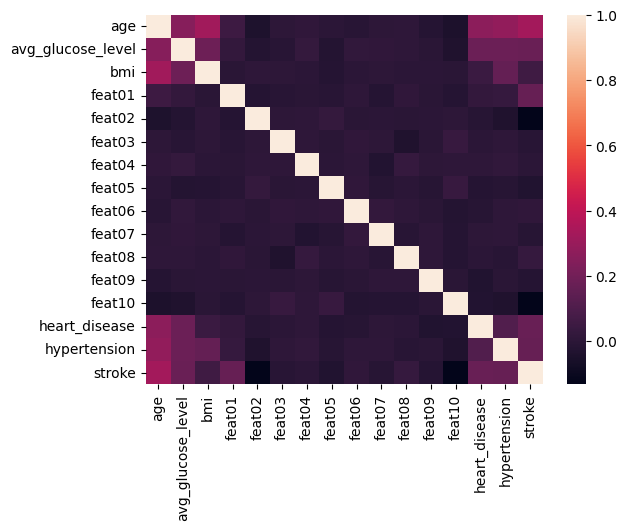

In [60]:
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix on the numeric columns
corr = stroke_data.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

### Factorization of categorical features

In [61]:
X_train_copy = X_train.copy()
cat_cols = X_train_copy.select_dtypes(include="object").columns

In [62]:
X_train_copy[cat_cols] = X_train_copy[cat_cols].apply(lambda x: pd.factorize(x)[0])

In [63]:
X_train_copy

,age,avg_glucose_level,bmi,ever_married,feat01,feat02,feat03,feat04,feat05,feat06,feat07,feat08,feat09,feat10,gender,heart_disease,hypertension,residence_type,smoking_status,work_type
1960,72.0000,85.8200,25.0000,0,0.5052,0.5884,0.6604,1.1819,1.1268,0.7556,0.4069,0.6632,1.0296,0.4590,0,1,0,0,0,0
1163,63.0000,93.2400,28.8000,0,0.3445,0.7257,1.2638,0.8641,1.1557,1.2759,1.2045,1.3485,0.9022,0.5199,1,0,0,1,1,1
3839,58.0000,170.9300,30.7000,1,0.4722,0.4665,1.4372,0.5551,1.5639,0.5440,0.6205,1.0394,0.8453,0.7252,0,0,0,1,2,0
3026,79.0000,90.7700,22.5000,0,0.2888,0.3997,1.1421,1.0072,0.6859,1.0088,0.6175,0.7305,0.3955,0.5396,1,0,0,1,1,1
5087,60.0000,86.0400,25.6000,0,0.6613,0.4053,1.1868,0.4444,1.1086,0.9252,1.0612,1.7483,0.9184,0.6597,0,0,1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,10.0000,69.2000,23.5000,1,0.3512,0.4463,1.4540,1.1966,1.3237,1.2983,0.6411,1.4213,0.4906,0.4946,0,0,0,1,0,3
2283,57.0000,106.2400,32.3000,0,0.6605,0.7062,0.6895,1.2730,1.1824,0.9115,1.0521,1.5312,1.7370,0.8475,0,0,0,0,1,1
2004,63.0000,62.1300,23.6000,0,0.5139,0.5608,1.2324,0.7516,1.6328,1.4094,0.9778,0.5758,0.7816,0.6385,1,0,1,0,1,1
3668,1.8000,95.2800,16.5000,1,0.6324,0.5525,0.6758,1.2759,0.7416,1.1128,0.8794,1.3113,0.7093,0.2258,1,0,0,1,2,3


In [64]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [65]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_copy, y_train)

RandomForestClassifier(random_state=0)

In [66]:
forest_importancies = pd.Series(forest.feature_importances_, index = X_train_copy.columns).sort_values(ascending=False)

In [67]:
forest_importancies.sort_values(ascending=False)

age                 0.1352
feat02              0.1252
feat10              0.0816
avg_glucose_level   0.0775
feat01              0.0768
feat08              0.0550
feat09              0.0537
bmi                 0.0528
feat06              0.0526
feat04              0.0516
feat05              0.0501
feat03              0.0501
feat07              0.0495
smoking_status      0.0205
hypertension        0.0148
heart_disease       0.0140
work_type           0.0138
ever_married        0.0097
residence_type      0.0080
gender              0.0075
dtype: float64

In [68]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [217]:
fig, ax = plt.subplots()
forest_importancies.plot.bar(yerr = std, ax = ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [222]:
X_test = X_test.drop(columns=['gender', 'residence_type'])
X_train = X_train.drop(columns=['gender', 'residence_type'])

## One Hot Encoding & Scaling 

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

In [70]:
num_columns = X_train.select_dtypes(exclude = 'object').columns.to_list()
cat_columns = X_train.select_dtypes(include = 'object').columns.to_list()

In [71]:
data_prep_pipeline = ColumnTransformer([
    ('num', StandardScaler(), num_columns), 
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), cat_columns)
]).set_output(transform='pandas')

In [72]:
X_train = data_prep_pipeline.fit_transform(X_train)

In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4286 entries, 1960 to 607
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   num__age                             4286 non-null   float64
 1   num__avg_glucose_level               4286 non-null   float64
 2   num__bmi                             4286 non-null   float64
 3   num__feat01                          4286 non-null   float64
 4   num__feat02                          4286 non-null   float64
 5   num__feat03                          4286 non-null   float64
 6   num__feat04                          4286 non-null   float64
 7   num__feat05                          4286 non-null   float64
 8   num__feat06                          4286 non-null   float64
 9   num__feat07                          4286 non-null   float64
 10  num__feat08                          4286 non-null   float64
 11  num__feat09                      

In [74]:
X_test = data_prep_pipeline.fit_transform(X_test)

In [75]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1072 entries, 5090 to 926
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   num__age                             1072 non-null   float64
 1   num__avg_glucose_level               1072 non-null   float64
 2   num__bmi                             1072 non-null   float64
 3   num__feat01                          1072 non-null   float64
 4   num__feat02                          1072 non-null   float64
 5   num__feat03                          1072 non-null   float64
 6   num__feat04                          1072 non-null   float64
 7   num__feat05                          1072 non-null   float64
 8   num__feat06                          1072 non-null   float64
 9   num__feat07                          1072 non-null   float64
 10  num__feat08                          1072 non-null   float64
 11  num__feat09                      

## Model Training

In [76]:
from scipy.stats import randint, uniform
from sklearn.base import BaseEstimator
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import (
    explained_variance_score,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)
from sklearn.model_selection import (
    RandomizedSearchCV,
    cross_val_score,
    train_test_split,
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor

### Random Forest

In [77]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [107]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [3,5,7,11],  # Number of trees in the forest
    'max_features': [2,4,6,8,26],     # Number of features to consider at each split
    'max_depth': [3, 5, 7]       # Maximum depth of the tree # Minimum number of samples required to be at a leaf node
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_classifier, 
                                   param_distributions=param_dist, 
                                   n_iter=50,  # Number of parameter settings that are sampled
                                   scoring='f1',  # Use recall as the scoring metric
                                   cv=kfold,  # Number of cross-validation folds
                                   n_jobs=-1,  # Use all available CPU cores
                                   random_state=42)

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)  # Assuming you have X_train and y_train for training data

# Get the best estimator from the search
best_rf_classifier = random_search.best_estimator_

# Now you can use best_rf_classifier for prediction or evaluation

In [93]:
best_rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 26,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 5,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [94]:
rf_predictions = best_rf_classifier.predict(X_test)


In [95]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

precision_score(y_test, rf_predictions)



0.696969696969697

In [96]:
recall_score(y_test, rf_predictions)

0.23711340206185566

In [97]:
f1_score(y_test, rf_predictions)

0.35384615384615387

In [98]:
roc_auc_score(y_test, rf_predictions)

0.6134284959027227

### AdaBoost 

In [106]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

model_adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), random_state=42, algorithm='SAMME.R')

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [3, 5, 7, 11, 100, 300],  # Number of gradient boosted trees
    'learning_rate': [0.01, 0.05, 0.1, 0.5],  # Boosting learning rate
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_adaboost, 
                                   param_distributions=param_dist, 
                                   n_iter=50,  # Number of parameter settings that are sampled
                                   scoring='f1',  # Use recall as the scoring metric
                                   cv=kfold,  # Number of cross-validation folds
                                   n_jobs=-1,  # Use all available CPU cores
                                   random_state=42)

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)  # Assuming you have X_train and y_train for training data

# Get the best estimator from the search
best_ada_classifier = random_search.best_estimator_

/Users/irenaz/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/irenaz/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/irenaz/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/irenaz/.pyenv/versions/3.9.18/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

In [84]:
best_ada_classifier.get_params()

{'algorithm': 'SAMME.R',
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': 1,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(max_depth=1),
 'learning_rate': 0.5,
 'n_estimators': 300,
 'random_state': 42}

In [85]:
ada_predictions = best_ada_classifier.predict(X_test)


In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

precision_score(y_test, ada_predictions)



0.7045454545454546

In [87]:
recall_score(y_test, ada_predictions)

0.31958762886597936

In [252]:
f1_score(y_test, ada_predictions)

0.43356643356643354

In [253]:
roc_auc_score(y_test, ada_predictions)

0.652101506740682

## XGBoost

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [3, 5, 7, 11, 100, 300],  # Number of gradient boosted trees
    'learning_rate': [0.01, 0.05],  # Boosting learning rate
    'max_depth': [3, 5, 7, 10, 15],  # Maximum depth of a tree
    # Add other XGBoost specific parameters if needed
}

# Initialize XGBClassifier
xgb_classifier = XGBClassifier(random_state=42)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=xgb_classifier, 
                                   param_distributions=param_dist, 
                                   n_iter=50,  # Number of parameter settings that are sampled
                                   scoring='f1',  # Use recall as the scoring metric
                                   cv=kfold,  # Number of cross-validation folds
                                   n_jobs=-1,  # Use all available CPU cores
                                   random_state=42)

# Perform RandomizedSearchCV
random_search.fit(X_train, y_train)  # Assuming you have X_train and y_train for training data

# Get the best estimator from the search
best_xgb_classifier = random_search.best_estimator_

# Now you can use best_xgb_classifier for prediction or evaluation
print(best_xgb_classifier.get_params())


{'objective': 'binary:logistic', 'use_label_encoder': False, 'base_score': 0.5, 'booster': 'gbtree', 'callbacks': None, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'gamma': 0, 'gpu_id': -1, 'grow_policy': 'depthwise', 'importance_type': None, 'interaction_constraints': '', 'learning_rate': 0.05, 'max_bin': 256, 'max_cat_to_onehot': 4, 'max_delta_step': 0, 'max_depth': 3, 'max_leaves': 0, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 300, 'n_jobs': 0, 'num_parallel_tree': 1, 'predictor': 'auto', 'random_state': 42, 'reg_alpha': 0, 'reg_lambda': 1, 'sampling_method': 'uniform', 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}


In [89]:
xgb_predictions = best_xgb_classifier.predict(X_test)


In [241]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

precision_score(y_test, xgb_predictions)



0.49230769230769234

In [242]:
recall_score(y_test, xgb_predictions)

0.32989690721649484

In [243]:
f1_score(y_test, xgb_predictions)

0.3950617283950617

In [244]:
roc_auc_score(y_test, xgb_predictions)

0.6480253766851705

# Model Comparison

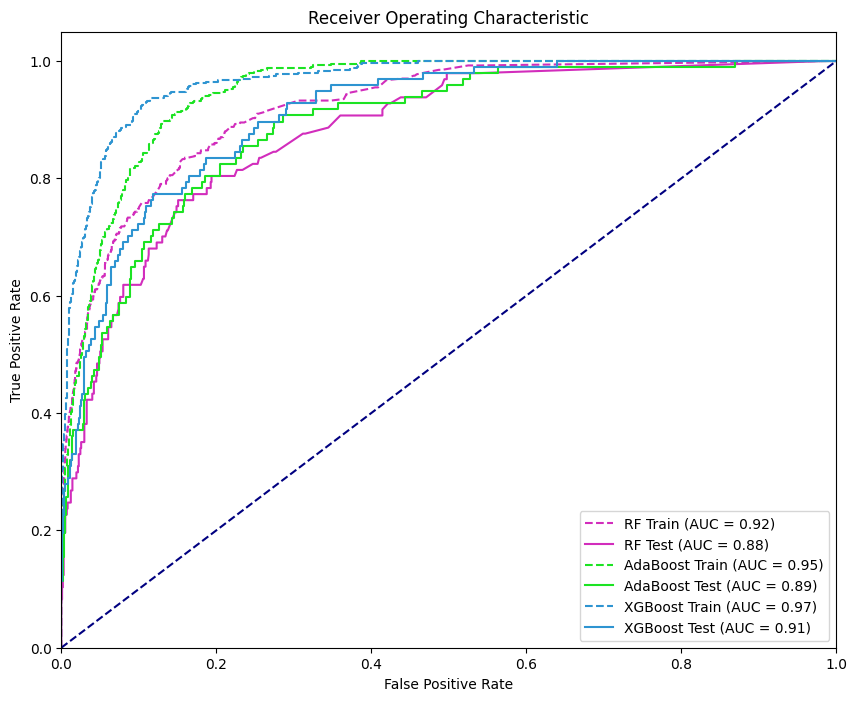

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have two models: model1, model2
# And your train and test data: X_train, y_train, X_test, y_test

models = [best_rf_classifier, best_ada_classifier, best_xgb_classifier]
model_names = ['RF', 'AdaBoost', 'XGBoost']
colors = ['#d22dbc', '#1ce323', '#2e94d1']  # colors for different models

plt.figure(figsize=(10, 8))

for i, model in enumerate(models):
    # Calculate ROC for training data
    y_train_pred = model.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    roc_auc_train = auc(fpr_train, tpr_train)

    # Calculate ROC for test data
    y_test_pred = model.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    roc_auc_test = auc(fpr_test, tpr_test)

    # Plot ROC for training data
    plt.plot(fpr_train, tpr_train, color=colors[i], linestyle='--', 
             label=f'{model_names[i]} Train (AUC = {roc_auc_train:.2f})')

    # Plot ROC for test data
    plt.plot(fpr_test, tpr_test, color=colors[i], linestyle='-', 
             label=f'{model_names[i]} Test (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()